<img src="u_stepLAX.gif" align="right" width="350px"/>

# $$\textbf{Step function version}$$

In this notebook I will solve the advection equation $u_t + a u_x=0$ using as an initial condition a step function profile $u(x,t=0)= \begin{cases} 
      1 & x \in [4, 6] \\
      0 & \text{elsewhere} 
   \end{cases}
$, with $x_0=5$.

We set the domain $x\in [0,10]$ with periodic boundary conditions, and we will compare the output from two methods. I here report the Lax-Friedrichs scheme.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=False)

/opt/anaconda3/lib/python3.9/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


In [2]:
# define the step function of the problem:

def step_profile(x_array, x0):
    
    u_prof = []
    
    for x in (x_array - x0): 
        
        if x < 4 or x > 6: 
            
            u_prof.append(0)
            
        if x >= 4 and x <= 6: 
            
            u_prof.append(1)
            
    return np.array(u_prof)

Define the initial values: 

In [3]:
#define the speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.5
dt = cf*dx/np.abs(a)   # Time step
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

nx= 101
dx= 0.1
dt= 0.05
Number of iterations= 400.0


In [4]:
x0=0
u_initial = step_profile(x, x0)

# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

## Evaluation of solution:
Step into the evolution of the function.

In [5]:
# Initialize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.xlabel("x [IU]")
plt.ylabel("$\mathrm{u}(x, t)$")
plt.savefig('./images/step/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

# add the array for the overall evolutions of the solutions over time: 

total_sol = []

#solve the advection equation
while t < t_final:
    
    total_sol.append(u_current)
    
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    
    u_next = 1 / 2 * (np.roll(u_current, -1) + np.roll(u_current, 1)) - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))    
    
    # Update the solution
    u_current = u_next.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    if (i%10==0):
        plt.plot(x, u_current, c='grey')
        plt.title('Time='+str(round(t,2)), fontsize=13)
        plt.ylim(0,1.1)
        plt.xlabel("x [IU]")
        plt.ylabel("$\mathrm{u}(x, t)$")
        plt.savefig('./images/step/fig2_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()

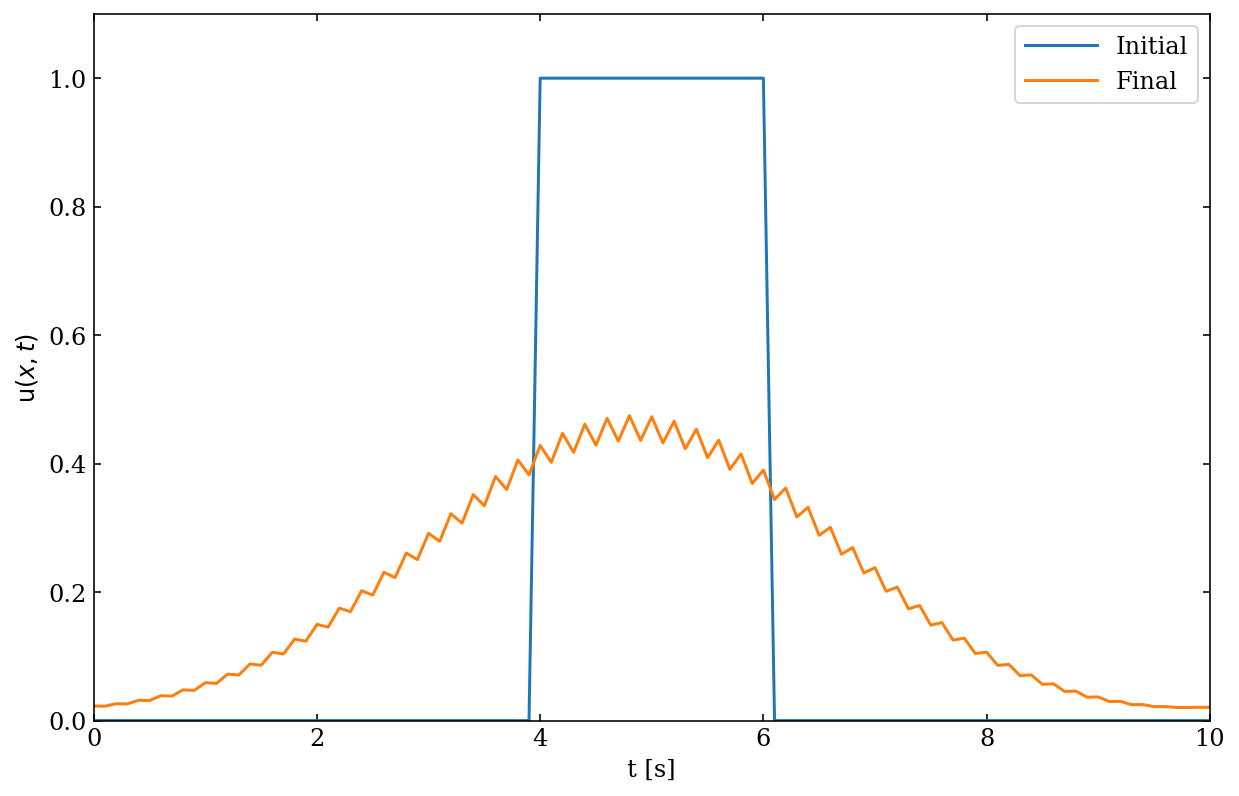

In [6]:
plt.figure(figsize = (10, 6.5))
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
#plt.title('Time='+str(round(t,2)))
plt.xlabel("t [s]")
plt.ylabel("$\mathrm{u}(x, t)$")
plt.ylim(0, 1.1)
plt.legend()
plt.show()

See how the norm evolves:

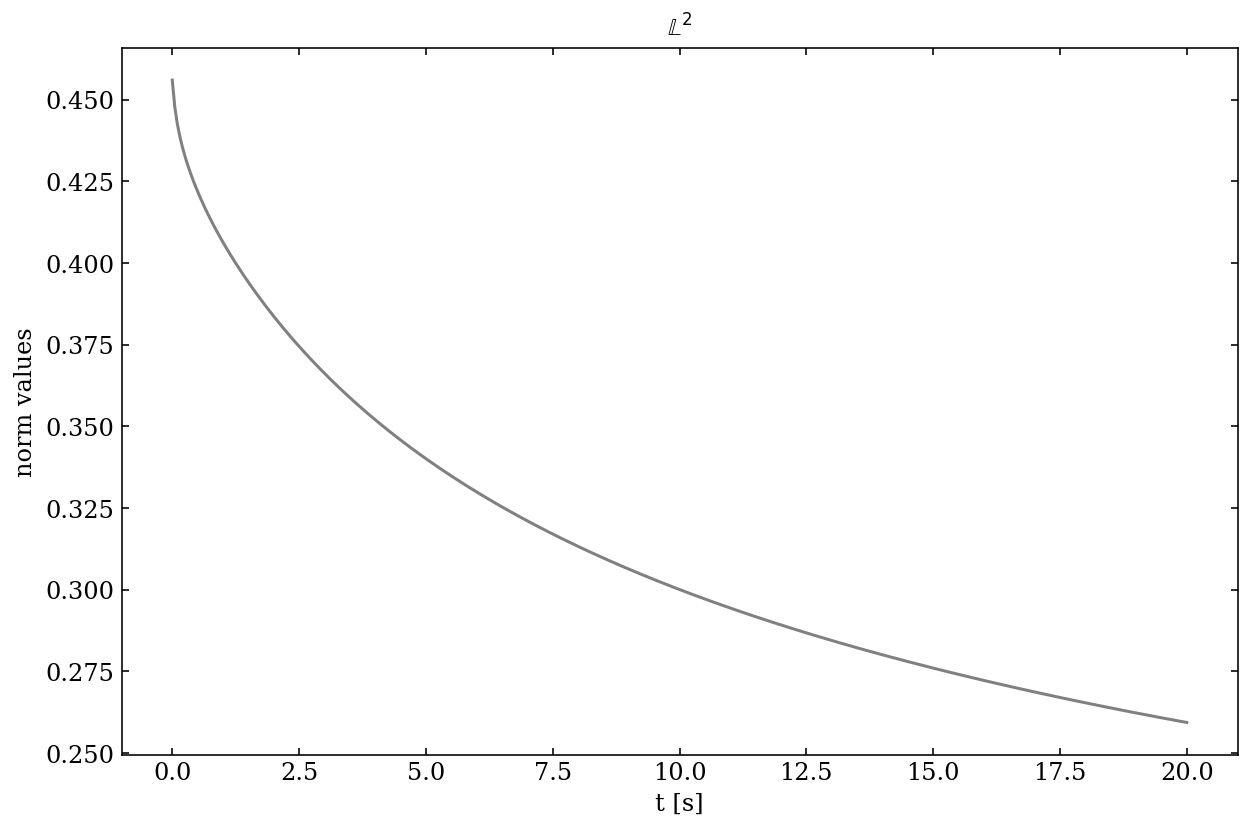

In [7]:
plt.figure(figsize = (10, 6.5))
plt.plot(time,l2norm, c='grey')
plt.xlabel("t [s]")
plt.ylabel("norm values")
plt.title("$\mathbb{L}^2$")
plt.margins(0.05, 0.05)
plt.savefig('norm_lf_step.png')
plt.show()

## FuncAnimation animations:
Again, I just report an additional code I developed to see animation without having to save the images every time.

In [8]:
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


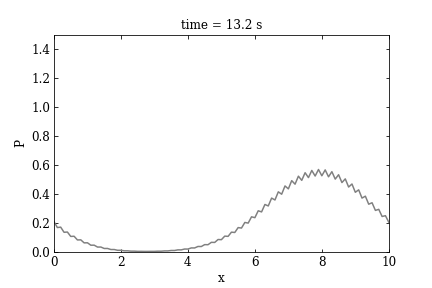

In [9]:
%matplotlib notebook

fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('P')
plotLine, = ax.plot(x, np.zeros(len(x))*np.NaN, '-', c='grey')
plotTitle = ax.set_title("t=0")
ax.set_ylim(0,1.5)
ax.set_xlim(0,10)


def solution(t):
    p = np.array(total_sol)[t]
    return p


def animate(t):
    pp = solution(t)
    plotLine.set_ydata(pp)
    plotTitle.set_text(f"time = {t/395*20:.1f} s")
    #ax.relim() # use if autoscale desired
    #ax.autoscale()
    return [plotLine,plotTitle]



ani = animation.FuncAnimation(fig, func=animate, frames=np.arange(0, len(total_sol), 5), blit=True)
ani.save('u_stepLF.gif')
plt.show()